# Final Project Task 1 Census Data Preprocessing

#### Student: Iacob Mihai

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

##### 1. Data loading and inspection

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
# Reading the data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

In [9]:
# Quick checks
df.shape
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.isna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Extra NA check
(df == "?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

##### 2. Data cleaning and duplicate removal

In [ ]:
# Baisc cleaning and removing duplicates
df_clean = df.copy()

# Removing spaces
obj_cols = df_clean.select_dtypes(include="object").columns
df_clean[obj_cols] = df_clean[obj_cols].apply(lambda s: s.str.strip())

# Looking for existing duplicates and removing them
n_before = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
n_after = df_clean.shape[0]

print(f"Rows before: {n_before}")
print(f"Rows after : {n_after}")
print(f"Duplicates removed: {n_before - n_after}")

# Duplicatele (24 obs) au fost eliminate
# Acestea contineau valori identice pentru toate variabilele si nu ofereau informatii suplimentare
# Pastrarea lor crea o pondere semnificativ mai mare pentru anumite profiluri si putea influenta estimarile regresiei


# Ensuring that the target is numerical 
df_clean["hours-per-week"] = pd.to_numeric(df_clean["hours-per-week"], errors="coerce")

df_clean.shape

C:\Users\mihai\AppData\Local\Temp\ipykernel_4444\1539607101.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  obj_cols = df_clean.select_dtypes(include="object").columns


Rows before: 32561
Rows after : 32537
Duplicates removed: 24


(32537, 15)

##### 3. Target definition

In [15]:
# Defining and separating the target
target = "hours-per-week"
y = df_clean[target]
X = df_clean.drop(columns=[target])

print(X.shape)
print(y.shape)

# Quick check
print("Target name:", y.name)
print("First 5 y values:")
print(y.head())


(32537, 14)
(32537,)
Target name: hours-per-week
First 5 y values:
0    40
1    13
2    40
3    40
4    40
Name: hours-per-week, dtype: int64


##### 4. Detection and missing value imputation

In [16]:
# Handling missing values
X.isna().sum()[X.isna().sum() > 0]


Series([], dtype: int64)

In [17]:
# Quick troubleshoot
# Pandas nu detecteaza "?" drept valori lipsa, asa ca trebuie sa le modificam
X_fixed = X.replace(["?", " ?"], np.nan)


In [ ]:
# Checking for missing values again
missing_counts = X_fixed.isna().sum()
missing_counts[missing_counts > 0].sort_values(ascending=False)

occupation        1843
workclass         1836
native-country     582
dtype: int64

In [22]:
# Observem ca variabilele cu valori lipsa sunt categorice, totusi mai facem un check sa vedem daca e adevarat
cat_cols = X_fixed.select_dtypes(include=["object"]).columns.tolist()
[x for x in cat_cols if X_fixed[x].isna().sum() > 0]


C:\Users\mihai\AppData\Local\Temp\ipykernel_4444\223357611.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X_fixed.select_dtypes(include=["object"]).columns.tolist()


['workclass', 'occupation', 'native-country']

In [23]:
# Eliminarea randurilor reduce substantial marimea esantionului.
# Astfel, voi folosi pentru imputare modul fiecarei dintre cele 3 variabile.

X_imputed = X_fixed.copy()

for col in ["workclass", "occupation", "native-country"]:
    n_missing = X_imputed[col].isna().sum()
    if n_missing > 0:
        fill_value = X_imputed[col].mode(dropna=True)[0]
        X_imputed[col] = X_imputed[col].fillna(fill_value)
        print(f"{col}: filled {n_missing} missing values with '{fill_value}'")


workclass: filled 1836 missing values with 'Private'
occupation: filled 1843 missing values with 'Prof-specialty'
native-country: filled 582 missing values with 'United-States'


In [ ]:
# Missing value check
X_imputed.isna().sum().sum()

# Observam ca nu au mai ramas valori lipsa

np.int64(0)

In [25]:
# Replacing x with x imputed
X = X_imputed


##### 5. Feature engineering

In [27]:
# Feature engineering
# Consider ca orele lucrate sunt structurate în funcție de etapa în care te afli în cursul vieții,
# de capitalul educațional pe care îl deții și de poziția socială pe care o ocupi pe piața muncii.
# Astfel, propun urmatoarele variabile:

# Age group
X["age_group"] = pd.cut(
    X["age"],
    bins=[0, 25, 40, 60, 100],
    labels=["young", "prime_early", "prime_late", "older"]
)

# Educational tier
X["education_tier"] = pd.cut(
    X["education-num"],
    bins=[0, 8, 12, 16],
    labels=["low_edu", "mid_edu", "high_edu"]
)

# Ocupational class position
def occ_class(occ):
    if occ in ["Exec-managerial", "Prof-specialty"]:
        return "upper_white_collar"
    elif occ in ["Adm-clerical", "Sales", "Tech-support"]:
        return "lower_white_collar"
    else:
        return "blue_or_service"

X["occupation_class"] = X["occupation"].apply(occ_class)

# quick check
X[["age", "age_group",
   "education-num", "education_tier",
   "occupation", "occupation_class"]].head(10)

,age,age_group,education-num,education_tier,occupation,occupation_class
0,39,prime_early,13,high_edu,Adm-clerical,lower_white_collar
1,50,prime_late,13,high_edu,Exec-managerial,upper_white_collar
2,38,prime_early,9,mid_edu,Handlers-cleaners,blue_or_service
3,53,prime_late,7,low_edu,Handlers-cleaners,blue_or_service
4,28,prime_early,13,high_edu,Prof-specialty,upper_white_collar
5,37,prime_early,14,high_edu,Exec-managerial,upper_white_collar
6,49,prime_late,5,low_edu,Other-service,blue_or_service
7,52,prime_late,9,mid_edu,Exec-managerial,upper_white_collar
8,31,prime_early,14,high_edu,Prof-specialty,upper_white_collar
9,42,prime_late,13,high_edu,Exec-managerial,upper_white_collar


##### 6. Outlier detection

In [30]:
# Outlier detection and treatment

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']

In [31]:
# Capping using IQR

X_out = X.copy()

for col in num_cols:
    Q1 = X_out[col].quantile(0.25)
    Q3 = X_out[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X_out[col] = X_out[col].clip(lower, upper)

    print(f"{col}: capped to [{lower:.2f}, {upper:.2f}]")


age: capped to [-2.00, 78.00]
fnlwgt: capped to [-60922.00, 415742.00]
education-num: capped to [4.50, 16.50]
capital-gain: capped to [0.00, 0.00]
capital-loss: capped to [0.00, 0.00]


In [ ]:
# Valorile extreme au fost tratate utilizând regula intervalului interquartilic (IQR). 
# Valorile situate în afara intervalului 1,5×IQR din prima si a treia quartila au fost winsorizate.

In [32]:
# Replacing x with the outlier clean version
X = X_out


##### 7. Train-test split

In [ ]:
# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      
    random_state=42     
)

print("X_train shape:", X_train_raw.shape)
print("X_test shape :", X_test_raw.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

# Am impartit setul de date în subseturi de antrenare (80%) și testare (20%) înainte de codificare și scalare.
# Astfel, toți parametrii de preprocesare vor fi învățați exclusiv din datele de antrenare.

X_train shape: (26029, 17)
X_test shape : (6508, 17)
y_train shape: (26029,)
y_test shape : (6508,)


##### 8. Preprocessing pipeline

In [34]:
# Identifying the numerical and categorical variables from the train set
num_cols = X_train_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train_raw.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric:", num_cols)
print("Categorical:", cat_cols)


Numeric: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']
Categorical: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income', 'age_group', 'education_tier', 'occupation_class']


C:\Users\mihai\AppData\Local\Temp\ipykernel_4444\722523857.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X_train_raw.select_dtypes(include=["object", "category"]).columns.tolist()


In [36]:
# Creating the preprocessing pipeline
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [37]:
# Fitting on the training data
X_train_proc = preprocessor.fit_transform(X_train_raw)
X_test_proc = preprocessor.transform(X_test_raw)

print("Processed train shape:", X_train_proc.shape)
print("Processed test shape :", X_test_proc.shape)


Processed train shape: (26029, 116)
Processed test shape : (6508, 116)


In [38]:
# Creating column names

ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([num_cols, cat_feature_names])

X_train_df = pd.DataFrame(
    X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc,
    columns=feature_names
)

X_test_df = pd.DataFrame(
    X_test_proc.toarray() if hasattr(X_test_proc, "toarray") else X_test_proc,
    columns=feature_names
)

X_train_df.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,age_group_older,age_group_prime_early,age_group_prime_late,age_group_young,education_tier_high_edu,education_tier_low_edu,education_tier_mid_edu,occupation_class_blue_or_service,occupation_class_lower_white_collar,occupation_class_upper_white_collar
0,-0.188070,-0.627661,-0.458342,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.992956,-0.768050,-0.458342,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.335699,0.237442,-0.051335,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.140584,-0.041966,-0.458342,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.630955,-1.093903,-0.458342,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


##### 9. Deliverable export

In [39]:
# Saving the train-test splits
y_train_reset = y_train.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

X_train_df_reset = X_train_df.reset_index(drop=True)
X_test_df_reset = X_test_df.reset_index(drop=True)


X_train_df_reset.to_csv("X_train.csv", index=False)
X_test_df_reset.to_csv("X_test.csv", index=False)

y_train_reset.to_csv("y_train.csv", index=False)
y_test_reset.to_csv("y_test.csv", index=False)

print("Saved: X_train.csv, X_test.csv, y_train.csv, y_test.csv")


Saved: X_train.csv, X_test.csv, y_train.csv, y_test.csv


In [40]:
# Saving the preprocessed data
X_full_proc = preprocessor.transform(X)

X_full_df = pd.DataFrame(
    X_full_proc.toarray() if hasattr(X_full_proc, "toarray") else X_full_proc,
    columns=feature_names
).reset_index(drop=True)

y_full_reset = y.reset_index(drop=True)

preprocessed_df = pd.concat([X_full_df, y_full_reset.rename("hours-per-week")], axis=1)

preprocessed_df.to_csv("preprocessed_data.csv", index=False)

print("Saved: preprocessed_data.csv")
print("Final preprocessed shape:", preprocessed_df.shape)


Saved: preprocessed_data.csv
Final preprocessed shape: (32537, 117)


In [41]:
# Sanity check
assert X_train_df.isna().sum().sum() == 0
assert X_test_df.isna().sum().sum() == 0
assert y_train.isna().sum() == 0
assert y_test.isna().sum() == 0
print("Sanity check passed: no missing values in processed datasets.")


Sanity check passed: no missing values in processed datasets.


##### 10. Exploratory check (other)

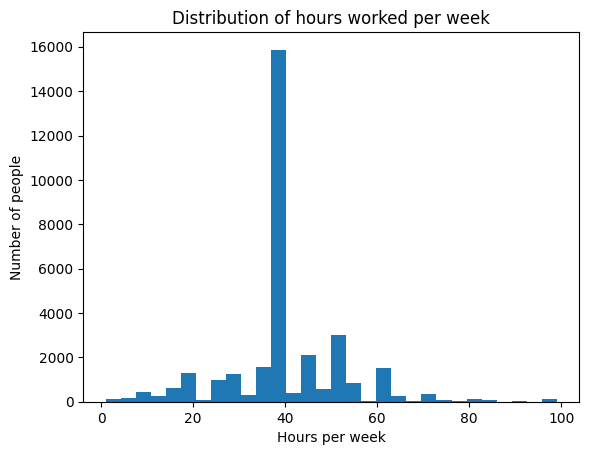

count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


In [42]:
# Target descriptives
import matplotlib.pyplot as plt

plt.hist(y, bins=30)
plt.title("Distribution of hours worked per week")
plt.xlabel("Hours per week")
plt.ylabel("Number of people")
plt.show()

print(y.describe())


In [ ]:
# Majoritatea persoanelor lucrează în jur de 40 de ore pe săptămână, cu grupuri mai mici care lucrează foarte puține sau foarte multe ore.

In [ ]:
# Check on the new features significance
print(df_clean.groupby(X["age_group"])["hours-per-week"].mean())
print(df_clean.groupby(X["education_tier"])["hours-per-week"].mean())
print(df_clean.groupby(X["occupation_class"])["hours-per-week"].mean())


age_group
young          33.899219
prime_early    42.837178
prime_late     43.005403
older          33.119691
Name: hours-per-week, dtype: float64
education_tier
low_edu     36.708098
mid_edu     40.027738
high_edu    43.441220
Name: hours-per-week, dtype: float64
occupation_class
blue_or_service       40.415536
lower_white_collar    39.182624
upper_white_collar    41.520211
Name: hours-per-week, dtype: float64


In [ ]:
# Numărul mediu de ore lucrate variază în mod sistematic în funcție de etapa de viață și de categoria profesională, ceea ce confirmă relevanța noilor features pentru estimarea timpului de muncă.